In [1]:
# Import useful libraries
import cv2
import numpy as np
import skimage.color as clr
import skimage.transform as trf
import skimage.util as uti
from Cryptodome.Cipher import AES
from Cryptodome.Random import get_random_bytes
from copy import copy
from matplotlib import pyplot as plt
import random

(-0.5, 63.5, 63.5, -0.5)

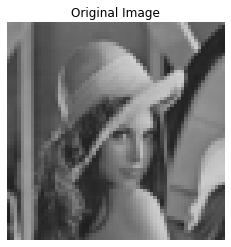

In [2]:
# read in the image, convert it to the right size 64x64 and plot for verification
im = cv2.imread('lena.png')
im = clr.rgb2gray(im)
im = uti.img_as_ubyte(trf.resize(im, (64,64)))

plt.imshow(im, vmin=0, vmax=255, cmap = "gray")
plt.title('Original Image')
plt.axis('off')

In [3]:
# chunk image procedure in blocks 4x4 and verify it works
blk_size = 4
n_blk = int(64/blk_size)
#fig, axs = plt.subplots(n_blk, n_blk)
#for i in range(n_blk**2):
#    axs[int(i//n_blk), int(i%n_blk)].imshow(im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)], vmin=0, vmax=255)
#    axs[int(i//n_blk), int(i%n_blk)].axis('off')

(-0.5, 63.5, 63.5, -0.5)

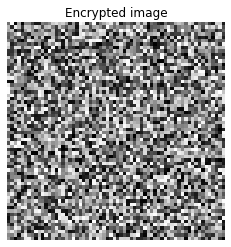

In [4]:
# Encryption of each 4x4 blocks (16 bytes of data) by AES-256 method and show encrypted image
enc_im = copy(im)
key = get_random_bytes(16)
cipher = AES.new(key, AES.MODE_EAX)
nonce =cipher.nonce
for i in range(n_blk**2):
    subim = im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.encrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(enc_im, vmin=0, vmax=255, cmap = "gray")
plt.title('Encrypted image')
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

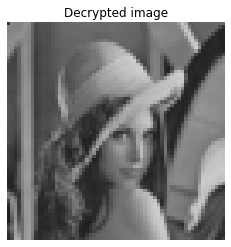

In [5]:
# model your attack here
# lets modify the very first value from the image
enc_im[0,0] = random.randint(0,256) 

# Decryption and show decrypted image
dec_im = copy(enc_im)
cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
for i in range(n_blk**2):
    subim = enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    dec_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.decrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(dec_im, vmin=0, vmax=255, cmap = "gray")
plt.title('Decrypted image')
plt.axis('off')

By changing a single pixel, here top left, the decryption will be faulty, and the image will have the resulting pixel wrong.  
Since there is no chaining operation, (2nd pixel doesnt depend on the previous one), all the other pixels are unchanged !  

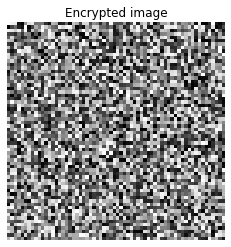

In [6]:
# Encryption of each 4x4 blocks (16 bytes of data) by AES-256 method and show encrypted image
enc_im = copy(im)
key = get_random_bytes(16)
cipher = AES.new(key, AES.MODE_EAX)
nonce =cipher.nonce
for i in range(n_blk**2):
    subim = im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.encrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(enc_im, vmin=0, vmax=255, cmap = "gray")
plt.title('Encrypted image')
plt.axis('off')

def addGaussianNoise(image , mu=0, sigma=1):
    return image + np.asarray([[np.random.normal(mu,sigma) for i in range(image.shape[1])] for j in range(image.shape[0])])

enc_im = addGaussianNoise(enc_im , mu=0, sigma=1)

(-0.5, 63.5, 63.5, -0.5)

C:\Users\Joao\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\image.py:479: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


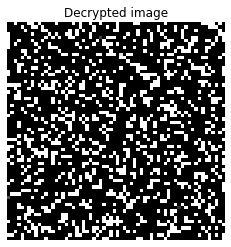

In [7]:
# Decryption and show decrypted image
dec_im = copy(enc_im)
cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
for i in range(n_blk**2):
    subim = enc_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)]
    dec_im[blk_size*int(i//n_blk):blk_size*(int(i//n_blk)+1), blk_size*int(i%n_blk):blk_size*(int(i%n_blk)+1)] = np.reshape(np.frombuffer(cipher.decrypt(subim.tobytes()), dtype = subim.dtype), subim.shape)
plt.imshow(dec_im, vmin=0, vmax=255, cmap = "gray")
plt.title('Decrypted image')
plt.axis('off')

In this case, every encrypted value was changed slightly.  
However, the AES encryption of two values very close to each other results in two very different results.  
This explains why a simple gaussian noise to the encrypted image, results in a complete different decryption result !  